# Twitter Hate Speech Detection

### Problem Statement:
The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. In this problem, we will take you through a hate speech detection model with Machine Learning and Python.</br>

Hate Speech Detection is generally a task of sentiment classification. So, for training, a model that can classify hate speech from a certain piece of text can be achieved by training it on a data that is generally used to classify sentiments. So, for the task of hate speech detection model, we will use the Twitter tweets to identify tweets containing Hate speech.</br>

Our goal is to classify tweets into two categories, hate speech or non-hate speech. Our project analyzed a dataset CSV file from Kaggle containing 31,962 tweets. 


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.text import Text

C:\Users\AMRAPALI\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Import Data

In [2]:
df = pd.read_csv('dataset/twitter_hate_speech.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Data Information

### Number of observations and features in the dataset

In [3]:
print("Number of observations: ", df.shape[0])
print("Number of features: ", df.shape[1])

Number of observations:  31962
Number of features:  3


### Features in the dataset

In [4]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

### Data type

In [5]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

### Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


### Data size

In [8]:
df.size

95886

### Predictors and Target Attributes

In [9]:
# Predictors attributes
text = df.iloc[:, 1:]
text.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [12]:
# Target attributes
label = df.iloc[:, 0:1]
label.head()

,id
0,1
1,2
2,3
3,4
4,5


### Checking missing values

In [13]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Visualize the distribution of target attribute for each class

In [14]:
# Label feature for each class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate speech: ',hate_speech)
print('Free Speech: ',free_speech)

Hate speech:  2242
Free Speech:  29720


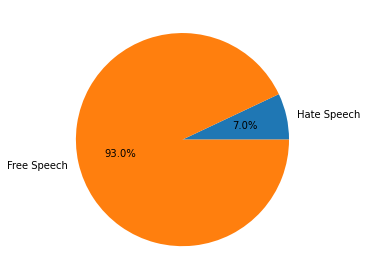

In [18]:
# Visualize Label class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech , labels = label, autopct= '%1.1f%%')
plt.tight_layout()
plt.show()

## Data Preprocessing

In the data preprocessing text will be clean with the help of Regular Expression and then using preprocessing operations Tokenization, to convert sentence into token. After tokenization stop words will be removed and then apply stemming to reducing a word to its word stem.

### Text Cleaning

<b> 1. Lower case
    
<b> 2. Remove Punctuation
    
<b> 3. Remove Urls
    
<b> 4. Removing @tags
    
<b> 5. Remove Special Characters

### 1. Lower case

In [19]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

### 2. Remove Punctuation

In [20]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

### 3. Remove URL

In [24]:
def remove_url(text):
    return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

df['tweet'] = df['tweet'].apply(remove_url)


### 4. Remove @tags

In [25]:
def remove_tags(text):
    return re.sub(r'(@[A-Za-z0-9]+)',"",text)

df['tweet'] = df['tweet'].apply(remove_tags)

### 5. Remove Special Characters

In [27]:
def remove_special_char(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['tweet'] = df['tweet'].apply(remove_special_char)